### Initialisation results using large sizes, high soil moisture and the combination

#### Libraries

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

import functions_py.fates_xarray_functions as fa
import functions_py.fates_nearest_gridcell as ngr

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm


In [2]:
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

In [3]:
pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']

In [4]:
w = [  2,   2,   6, -10,  10,   6,  10, -18, -14,  -6,  10, -14,  -2,
        18,  14,  14, -18]
z = [ 25,  30, 355,  35, 285, 295, 275, 315, 295, 310, 295, 305, 280,
       100, 100,  75, 145]
lat_un = xr.DataArray(w, dims = ['location']).astype(int)
lon_un = xr.DataArray(z, dims = ['location']).astype(int)

#### Load all the variations

In [5]:
# atkin - control - low soil moisture, small size (june start)
#fates_atkin = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_control.Eb645be3-Fb8b905c.2023-02-28/run/lnd/hist/fixedbiogeog_nocomp_Atkin_control.Eb645be3-Fb8b905c.2023-02-28.elm.h0.2000s.nc'
# atkin - control - low soil moisture, small size (jan start)
fates_atkin = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_control.Eb645be3-F2395e6f.2023-03-01/run/fixedbiogeog_nocomp_Atkin_control.Eb645be3-F2395e6f.2023-03-01.elm.h0.sofar.nc'
fates_atkin = xr.open_dataset(fates_atkin, decode_times=False)
time = fates_atkin.variables['time']/365.

n_lat = len(fates_atkin.variables['lat'])
n_lon = len(fates_atkin.variables['lon'])
cohort_size_bins = fates_atkin.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

nyears = int(len(fates_atkin.variables['time'])/12)
time = fates_atkin.variables['time'] / 365.

# atkin - low soil moisture, large size
fates_atkin_v2 = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_init_dbh.Eb645be3-F0a36a4c.2023-02-28/run/lnd/hist/fixedbiogeog_nocomp_Atkin_init_dbh.Eb645be3-F0a36a4c.2023-02-28.elm.h0.2000s.nc'
fates_atkin_v2 = xr.open_dataset(fates_atkin_v2, decode_times=False)
time_v2 = fates_atkin_v2.variables['time']/365.

# atkin - high soil moisture, small size
fates_atkin_v3 = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_high_soil_moisture.Eb645be3-F2395e6f.2023-03-01/run/lnd/hist/fixedbiogeog_nocomp_Atkin_high_soil_moisture.Eb645be3-F2395e6f.2023-03-01.elm.h0.2000s.nc'
fates_atkin_v3 = xr.open_dataset(fates_atkin_v3, decode_times=False)
time_v3 = fates_atkin_v3.variables['time']/365.

# atkin - high soil moisture, large size
fates_atkin_v4 = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_high_soilmoisture_dbh_init.Eb645be3-F0a36a4c.2023-02-28/run/lnd/hist/fixedbiogeog_nocomp_Atkin_high_soilmoisture_dbh_init.Eb645be3-F0a36a4c.2023-02-28.elm.h0.2000s.nc'
fates_atkin_v4 = xr.open_dataset(fates_atkin_v4, decode_times=False)
time_v4 = fates_atkin_v4.variables['time']/365.

### Veg C through time in the problem grid cells

##### Higher soil moisture prevents extinction in some of the grid cells

In [6]:
vegc_atkin = fates_atkin.FATES_VEGC
vegc_atkin = vegc_atkin.sel(lat=lat_un,lon=lon_un)

vegc_atkin_v2 = fates_atkin_v2.FATES_VEGC
vegc_atkin_v2 = vegc_atkin_v2.sel(lat=lat_un,lon=lon_un)

vegc_atkin_v3 = fates_atkin_v3.FATES_VEGC
vegc_atkin_v3 = vegc_atkin_v3.sel(lat=lat_un,lon=lon_un)

vegc_atkin_v4 = fates_atkin_v4.FATES_VEGC
vegc_atkin_v4 = vegc_atkin_v4.sel(lat=lat_un,lon=lon_un)


Text(0.02, 0.5, 'Veg C')

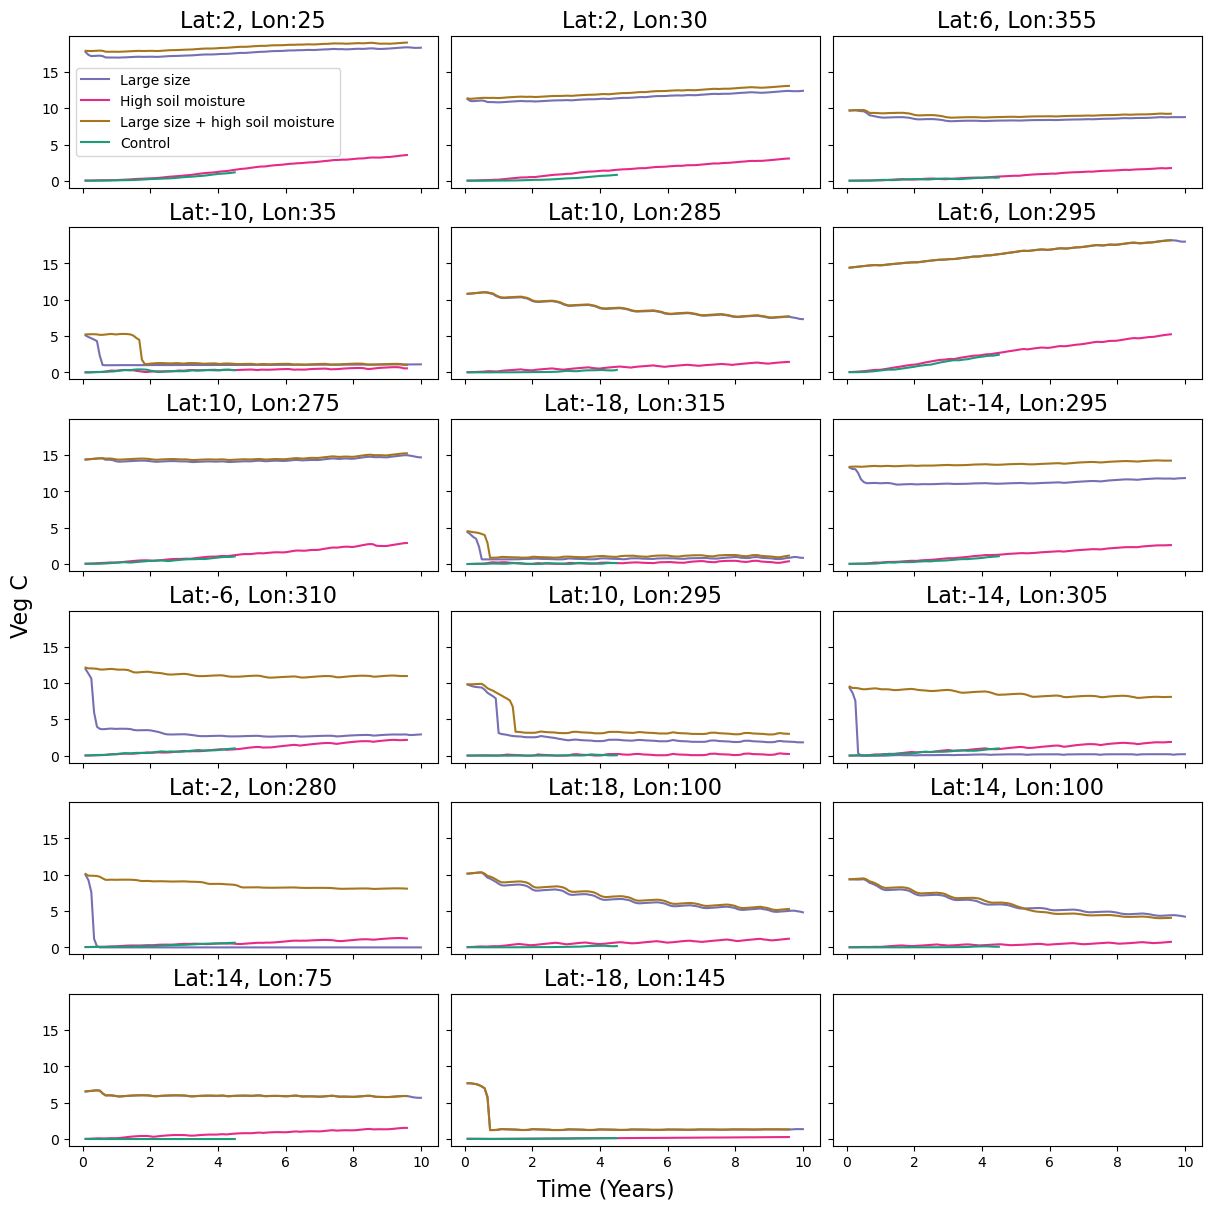

In [7]:
fig, axs = plt.subplots(nrows=6,ncols=3,
                        figsize=(12,12), sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0,17):
    
    axs[i].plot(time_v2, vegc_atkin_v2[:,i], label='Large size', color=colormap[2])
    axs[i].plot(time_v3, vegc_atkin_v3[:,i], label='High soil moisture', color=colormap[3])
    axs[i].plot(time_v4, vegc_atkin_v4[:,i], label='Large size + high soil moisture', color=colormap[6])
    axs[i].plot(time, vegc_atkin[:,i], label='Control', color=colormap[0])
    axs[i].set_title(r'Lat:{0}, Lon:{1}'.format(w[i],z[i]), fontsize = 16)
    if i == 0 :
        axs[i].legend()
    
    
fig.supxlabel(r'Time (Years)', fontsize=16)
fig.supylabel(r'Veg C', fontsize=16)

### SP mode GPP in problem grid cells

In [8]:
fates_atkin_SP = '/compyfs/need138/elm_runs/spmode_atkin_newvertprof.Ec63cce2-F76adbb7.2022-11-22/run/lnd/hist/spmode_atkin_newvertprof.Ec63cce2-F76adbb7.2022-11-22.elm.h0.fullrun.nc'
fates_atkin_SP = xr.open_dataset(fates_atkin_SP, decode_times=False)

timeSP = fates_atkin_SP.variables['time'] / 365.
print(len(timeSP))

120


### Total GPP in SP mode v biomass in FBNC (year 10)

(0.0, 20.0)

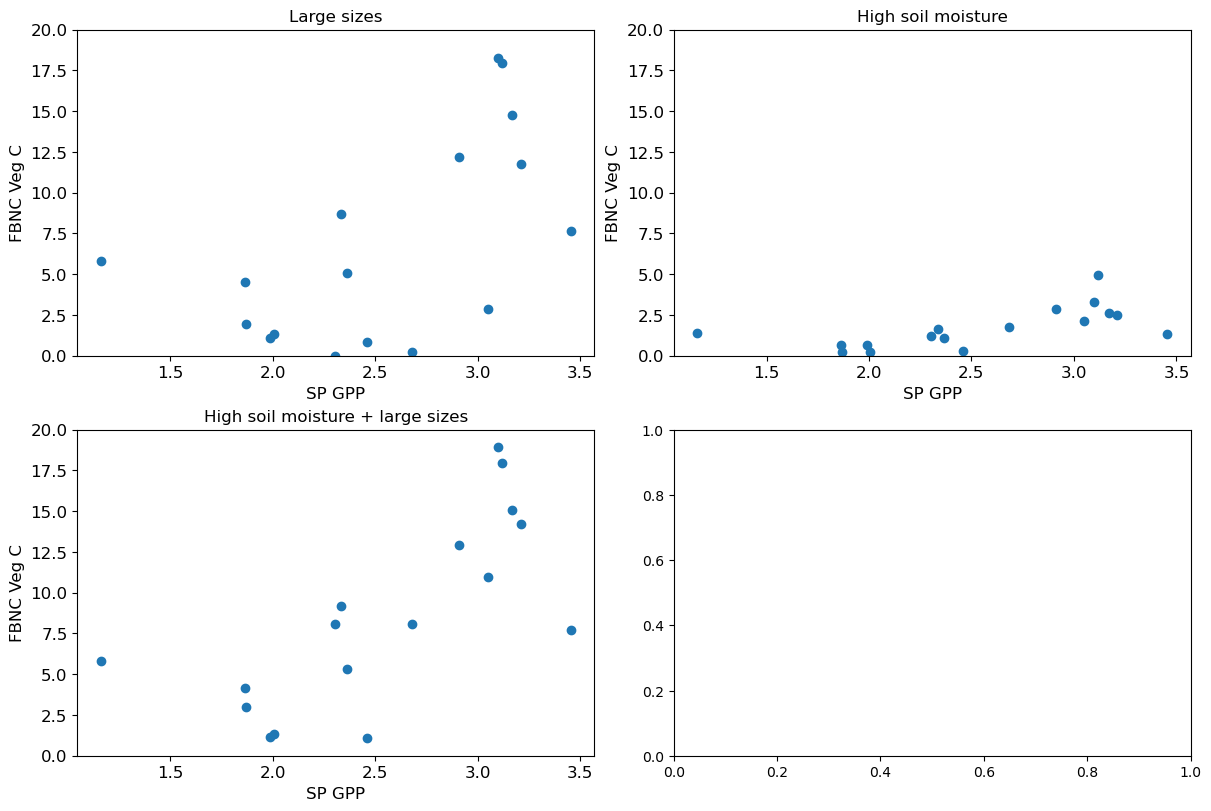

In [9]:
gpp_SP = fates_atkin_SP.FATES_GPP.mean('time')* 86400 * 365
gpp_SP = gpp_SP.sel(lat=lat_un,lon=lon_un)
 
vegc_FBNC = fates_atkin.FATES_VEGC.isel(time=slice(102,114)).mean(dim='time')
vegc_FBNC = vegc_FBNC.sel(lat=lat_un,lon=lon_un)

vegc_FBNC_v2 = fates_atkin_v2.FATES_VEGC.isel(time=slice(102,114)).mean(dim='time')
vegc_FBNC_v2 = vegc_FBNC_v2.sel(lat=lat_un,lon=lon_un)

vegc_FBNC_v3 = fates_atkin_v3.FATES_VEGC.isel(time=slice(102,114)).mean(dim='time')
vegc_FBNC_v3 = vegc_FBNC_v3.sel(lat=lat_un,lon=lon_un)

vegc_FBNC_v4 = fates_atkin_v4.FATES_VEGC.isel(time=slice(102,114)).mean(dim='time')
vegc_FBNC_v4 = vegc_FBNC_v4.sel(lat=lat_un,lon=lon_un)


fig2, ((f2ax0, f2ax1),(f2ax2, f2ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(12,8), constrained_layout=True)

# f2ax0.scatter(gpp_SP, vegc_FBNC)
# f2ax0.set_title(r'Control', fontsize = 12)
# f2ax0.set_ylabel(r'FBNC Veg C', fontsize = 12)
# f2ax0.set_xlabel(r'SP GPP', fontsize = 12)
# f2ax0.tick_params(labelsize=12)
# f2ax0.set_ylim(0,20)

f2ax0.scatter(gpp_SP, vegc_FBNC_v2)
f2ax0.set_title(r'Large sizes', fontsize = 12)
f2ax0.set_ylabel(r'FBNC Veg C', fontsize = 12)
f2ax0.set_xlabel(r'SP GPP', fontsize = 12)
f2ax0.tick_params(labelsize=12)
f2ax0.set_ylim(0,20)           

f2ax1.scatter(gpp_SP, vegc_FBNC_v3)
f2ax1.set_title(r'High soil moisture', fontsize = 12)
f2ax1.set_ylabel(r'FBNC Veg C', fontsize = 12)
f2ax1.set_xlabel(r'SP GPP', fontsize = 12)
f2ax1.tick_params(labelsize=12)
f2ax1.set_ylim(0,20)       

f2ax2.scatter(gpp_SP, vegc_FBNC_v4)
f2ax2.set_title(r'High soil moisture + large sizes', fontsize = 12)
f2ax2.set_ylabel(r'FBNC Veg C', fontsize = 12)
f2ax2.set_xlabel(r'SP GPP', fontsize = 12)
f2ax2.tick_params(labelsize=12)
f2ax2.set_ylim(0,20)       